In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mobiles_Dataset.csv')
df.head()

,Product Name,Actual price,Discount price,Stars,Rating,Reviews,RAM (GB),Storage (GB),Display Size (inch),Camera,Description,Link
0,"Apple iPhone 15 (Green, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-green...
1,"Apple iPhone 15 (Blue, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-blue-...
2,"Apple iPhone 15 (Black, 128 GB)","₹79,600","₹65,999",4.6,"44,793 Ratings","2,402 Reviews",NIL,128,6.10,48MP + 12MP,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://www.flipkart.com/apple-iphone-15-black...
3,"OnePlus N20 SE (JADE WAVE, 128 GB)","₹19,999","₹11,489",4.0,"1,005 Ratings",41 Reviews,4,128,6.56,50MP,4 GB RAM | 128 GB ROM16.66 cm (6.56 inch) Disp...,https://www.flipkart.com/oneplus-n20-se-jade-w...
4,"OnePlus N20 SE (BLUE OASIS, 64 GB)","₹16,999","₹12,999",4.0,"1,005 Ratings",41 Reviews,4,64,6.56,50MP,4 GB RAM | 64 GB ROM16.66 cm (6.56 inch) Displ...,https://www.flipkart.com/oneplus-n20-se-blue-o...


In [13]:
df['Actual price'] = df['Actual price'].replace({'₹': '', ',': '', 'NIL': None}, regex=True).astype(float)
df['Actual price'] = pd.to_numeric(df['Actual price'], errors='coerce')

df['Discount price'] = df['Discount price'].replace({'₹': '', ',': '', 'NIL': None}, regex=True)
df['Discount price'] = pd.to_numeric(df['Discount price'], errors='coerce')

df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'], errors='coerce')

df['Storage (GB)'] = pd.to_numeric(df['Storage (GB)'], errors='coerce')

df['Display Size (inch)'] = pd.to_numeric(df['Display Size (inch)'], errors='coerce')

In [17]:
df.dtypes

Product Name            object
Actual price           float64
Discount price         float64
Stars                  float64
Rating                  object
Reviews                 object
RAM (GB)               float64
Storage (GB)           float64
Display Size (inch)    float64
Camera                  object
Description             object
Link                    object
dtype: object

In [18]:
df.isnull().sum()

Product Name             0
Actual price            54
Discount price           4
Stars                    0
Rating                   0
Reviews                  0
RAM (GB)               161
Storage (GB)           109
Display Size (inch)      0
Camera                  76
Description              0
Link                     0
dtype: int64

In [20]:
numeric_desc = df[['Actual price', 'Discount price', 'Stars', 'Rating', 'Reviews', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)']].describe()
numeric_desc

,Actual price,Discount price,Stars,RAM (GB),Storage (GB),Display Size (inch)
count,930.000000,980.000000,984.000000,823.000000,875.000000,984.000000
mean,25263.134409,21524.401020,4.254980,121.469016,180.529143,6.043116
std,22257.240721,20843.490674,0.199734,2308.990847,103.082913,1.581261
min,1199.000000,809.000000,3.400000,2.000000,0.000000,0.660000
25%,11999.000000,8999.000000,4.200000,6.000000,128.000000,6.500000
50%,19999.000000,15999.000000,4.300000,8.000000,128.000000,6.670000
75%,30999.000000,27444.000000,4.400000,8.000000,256.000000,6.720000
max,149999.000000,176999.000000,5.000000,46875.000000,512.000000,7.820000


Handling Missing Values

In [24]:
df['Actual price'].fillna(df['Actual price'].median(), inplace=True)

/tmp/ipykernel_14332/1646431828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Actual price'].fillna(df['Actual price'].median(), inplace=True)


In [26]:
df['Discount price'].fillna(df['Discount price'].median(), inplace=True)

/tmp/ipykernel_14332/29337632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount price'].fillna(df['Discount price'].median(), inplace=True)


In [27]:
df['RAM (GB)'].fillna(df['RAM (GB)'].median(), inplace=True)

/tmp/ipykernel_14332/3383946223.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RAM (GB)'].fillna(df['RAM (GB)'].median(), inplace=True)


In [28]:
df['Storage (GB)'].fillna(df['Storage (GB)'].median(), inplace=True)

/tmp/ipykernel_14332/2771226260.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Storage (GB)'].fillna(df['Storage (GB)'].median(), inplace=True)


In [29]:
df['Camera'].fillna('Unknown', inplace=True)

/tmp/ipykernel_14332/1673886979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Camera'].fillna('Unknown', inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         984 non-null    object 
 1   Actual price         984 non-null    float64
 2   Discount price       984 non-null    float64
 3   Stars                984 non-null    float64
 4   Rating               984 non-null    object 
 5   Reviews              984 non-null    object 
 6   RAM (GB)             984 non-null    float64
 7   Storage (GB)         984 non-null    float64
 8   Display Size (inch)  984 non-null    float64
 9   Camera               984 non-null    object 
 10  Description          984 non-null    object 
 11  Link                 984 non-null    object 
dtypes: float64(6), object(6)
memory usage: 92.4+ KB


Sentimental Analysis

In [34]:
from textblob import TextBlob

In [31]:
def preprocess_text(text):
    text = text.lower()
    text = text.replace(',', '')
    return text

df['cleaned_description'] = df['Description'].apply(preprocess_text)

In [35]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['cleaned_description'].apply(get_sentiment)

In [37]:
def sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
df['sentiment_label'] = df['sentiment'].apply(sentiment_label)

/tmp/ipykernel_14332/2380081085.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


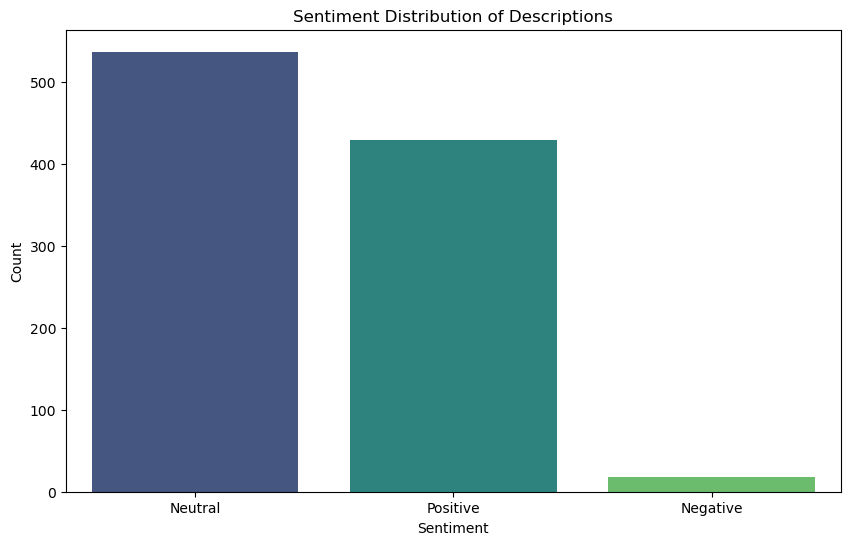

In [48]:
sentiment_counts = df['sentiment_label'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Descriptions')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Visualization

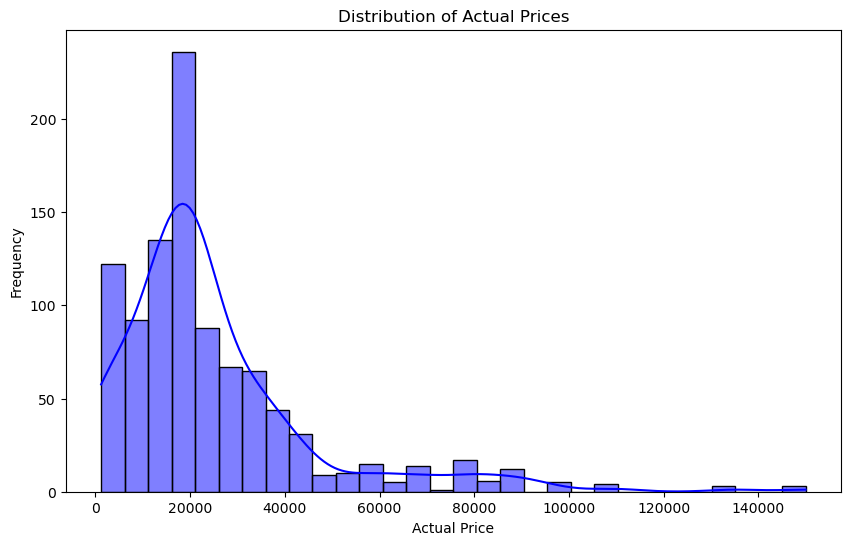

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Actual price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

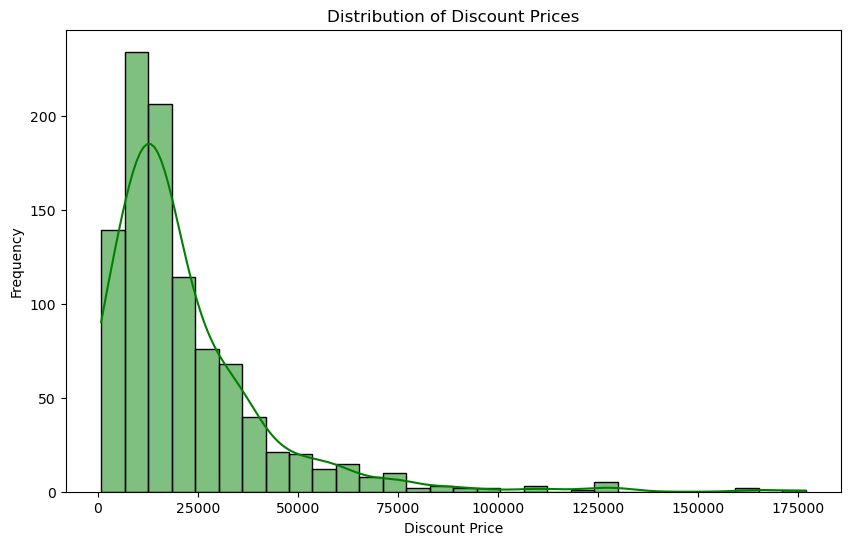

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount price'], bins=30, kde=True, color='green')
plt.title('Distribution of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()

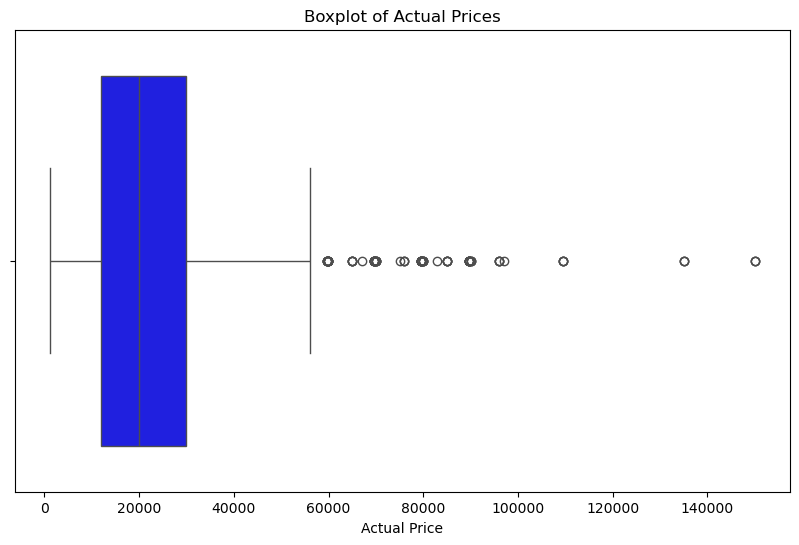

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Actual price'], color='blue')
plt.title('Boxplot of Actual Prices')
plt.xlabel('Actual Price')
plt.show()

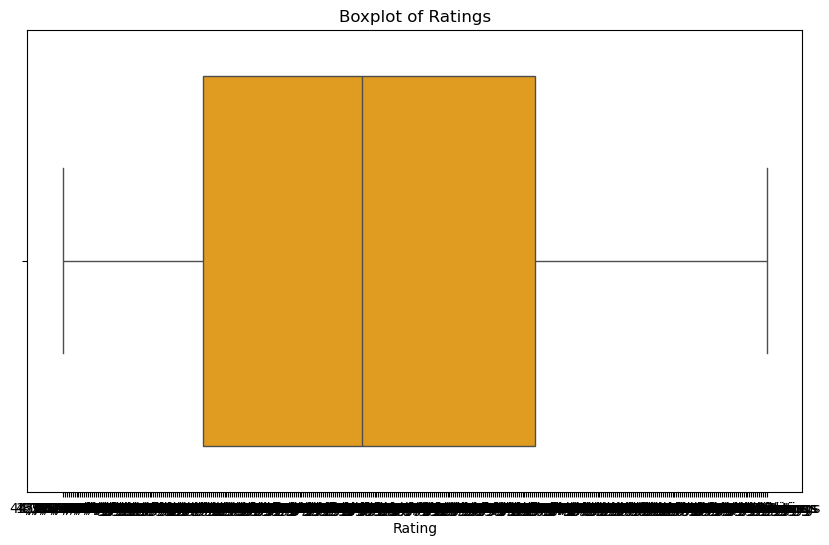

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Rating'], color='orange')
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

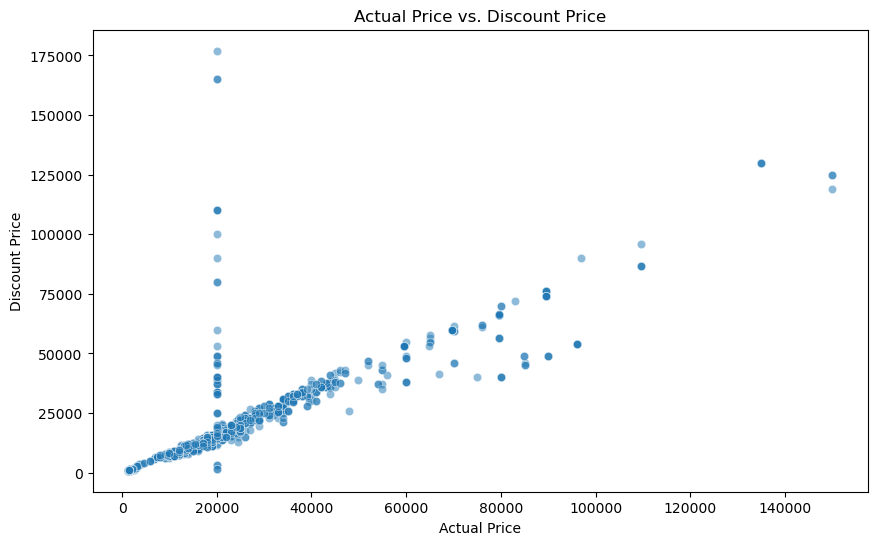

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Actual price'], y=df['Discount price'], alpha=0.5)
plt.title('Actual Price vs. Discount Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Price')
plt.show()

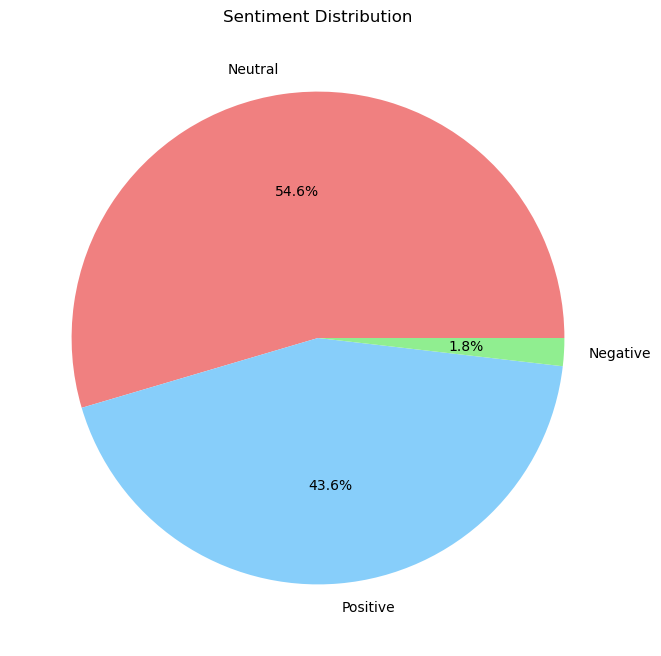

In [80]:
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.show()

Feature Engineering

In [82]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [83]:
def preprocess_text(text):
    text = text.lower() 
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  
    return text

df['cleaned_description'] = df['Description'].apply(preprocess_text)

In [84]:
df['cleaned_description']

0      gb rom cm inch super retina xdr displaymp mp m...
1      gb rom cm inch super retina xdr displaymp mp m...
2      gb rom cm inch super retina xdr displaymp mp m...
3      gb ram gb rom cm inch displaymp mah battery month
4      gb ram gb rom cm inch displaymp mah batteryno ...
                             ...                        
979    mb ram mb rom expandable upto gb cm inch qvga ...
980    mb ram mb rom expandable upto gb cm inch fwvga...
981    mb ram mb rom expandable upto gb cm inch fwvga...
982    mb ram mb rom expandable upto gb cm inch fwvga...
983    mb ram mb rom expandable upto gb cm inch fwvga...
Name: cleaned_description, Length: 984, dtype: object

In [86]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['cleaned_description'])
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

df_combined = pd.concat([df, df_bow], axis=1)

In [90]:
df['description_length'] = df['cleaned_description'].apply(lambda x: len(x.split()))

In [88]:
df['word_count'] = df['cleaned_description'].apply(lambda x: len(x.split()))

In [89]:
df['char_count'] = df['cleaned_description'].apply(len)

In [91]:
keywords = ['battery', 'camera', 'processor']
for keyword in keywords:
    df[f'has_{keyword}'] = df['cleaned_description'].apply(lambda x: 1 if keyword in x else 0)

In [94]:
df[['description_length', 'word_count', 'char_count']].head()

,description_length,word_count,char_count
0,22,22,138
1,22,22,138
2,22,22,138
3,10,10,49
4,10,10,54


In [95]:
df[['has_battery', 'has_camera', 'has_processor']].head()

,has_battery,has_camera,has_processor
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0


Comparison with other brands

In [96]:
df['Brand'] = df['Product Name'].apply(lambda x: x.split()[0])

In [98]:
df['Brand']

0         Apple
1         Apple
2         Apple
3       OnePlus
4       OnePlus
         ...   
979    Kechaoda
980    Kechaoda
981    Kechaoda
982    Kechaoda
983    Kechaoda
Name: Brand, Length: 984, dtype: object

In [100]:
df['Actual price'] = pd.to_numeric(df['Actual price'].replace({'₹': '', ',': ''}, regex=True), errors='coerce')
df['Discount price'] = pd.to_numeric(df['Discount price'].replace({'₹': '', ',': ''}, regex=True), errors='coerce')
df['RAM (GB)'] = pd.to_numeric(df['RAM (GB)'].replace('NIL', 0), errors='coerce')
df['Storage (GB)'] = pd.to_numeric(df['Storage (GB)'], errors='coerce')
df['Display Size (inch)'] = pd.to_numeric(df['Display Size (inch)'], errors='coerce')

In [101]:
df.dropna(subset=['Actual price', 'Discount price', 'RAM (GB)', 'Storage (GB)', 'Display Size (inch)'], inplace=True)

In [110]:
brand_summary = df.groupby('Brand').agg({
    'Actual price': ['mean', 'median', 'std'],
    'Discount price': ['mean', 'median', 'std'],
    'Stars': ['mean', 'median'],
    'Rating': ['mean', 'median'],
    'RAM (GB)': ['mean', 'median'],
    'Storage (GB)': ['mean', 'median'],
    'Display Size (inch)': ['mean', 'median']
}).reset_index()


In [105]:
df.dtypes

Product Name            object
Actual price           float64
Discount price         float64
Stars                  float64
Rating                  object
Reviews                float64
RAM (GB)               float64
Storage (GB)           float64
Display Size (inch)    float64
Camera                   int64
Description             object
Link                    object
cleaned_description     object
sentiment              float64
sentiment_label         object
Discount Percentage    float64
description_length       int64
word_count               int64
char_count               int64
has_battery              int64
has_camera               int64
has_processor            int64
Brand                   object
dtype: object

In [107]:
def extract_rating(rating_str):
    match = re.search(r'\d+', rating_str)
    return int(match.group()) if match else None

In [108]:
df['Rating'] = df['Rating'].apply(extract_rating)

In [111]:
df['Rating']

0      44
1      44
2      44
3       1
4       1
       ..
979    11
980    11
981    11
982    11
983    11
Name: Rating, Length: 984, dtype: int64

In [112]:
print(brand_summary)

        Brand  Actual price                        Discount price           \
                       mean   median           std           mean   median   
0       Apple  78084.615385  79600.0  15659.796639   64883.615385  59999.0   
1   BlackZone   2199.000000   2199.0      0.000000    1569.000000   1569.0   
2         CMF  20999.000000  20999.0   1095.445115   16999.000000  16999.0   
3      Google  55732.333333  59999.0  20923.215632   47732.333333  37999.0   
4       Honor  39499.000000  39499.0  12020.815280   24472.500000  24472.5   
5           I   2865.666667   2999.0    230.940108    1630.000000   1841.0   
6        IQOO  22699.050000  21499.5   7134.794656   18161.400000  15913.0   
7     Infinix  16136.254902  10999.0   8641.804459   12655.862745   8999.0   
8         Jio   2749.000000   2749.0   1060.660172    2344.500000   2344.5   
9     KARBONN   1412.222222   1240.0    234.668797    1042.000000    930.0   
10   Kechaoda   1562.850000   1499.0    207.212394    1100.15000

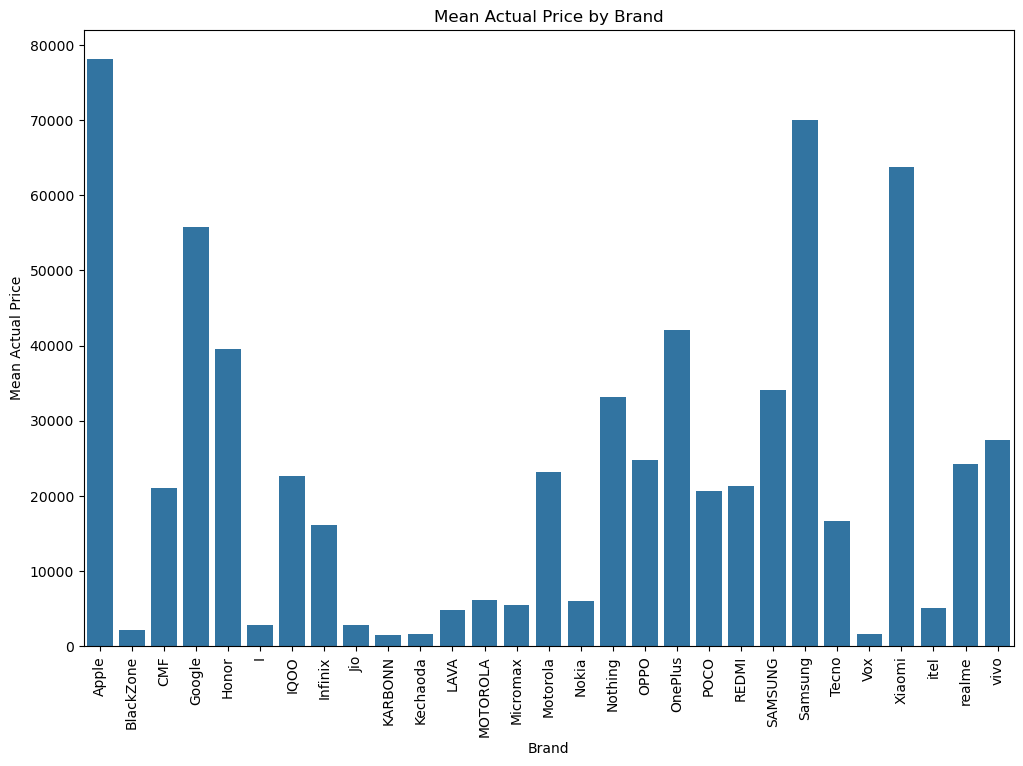

In [114]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y=('Actual price', 'mean'), data=brand_summary)
plt.title('Mean Actual Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Mean Actual Price')
plt.xticks(rotation=90)
plt.show()

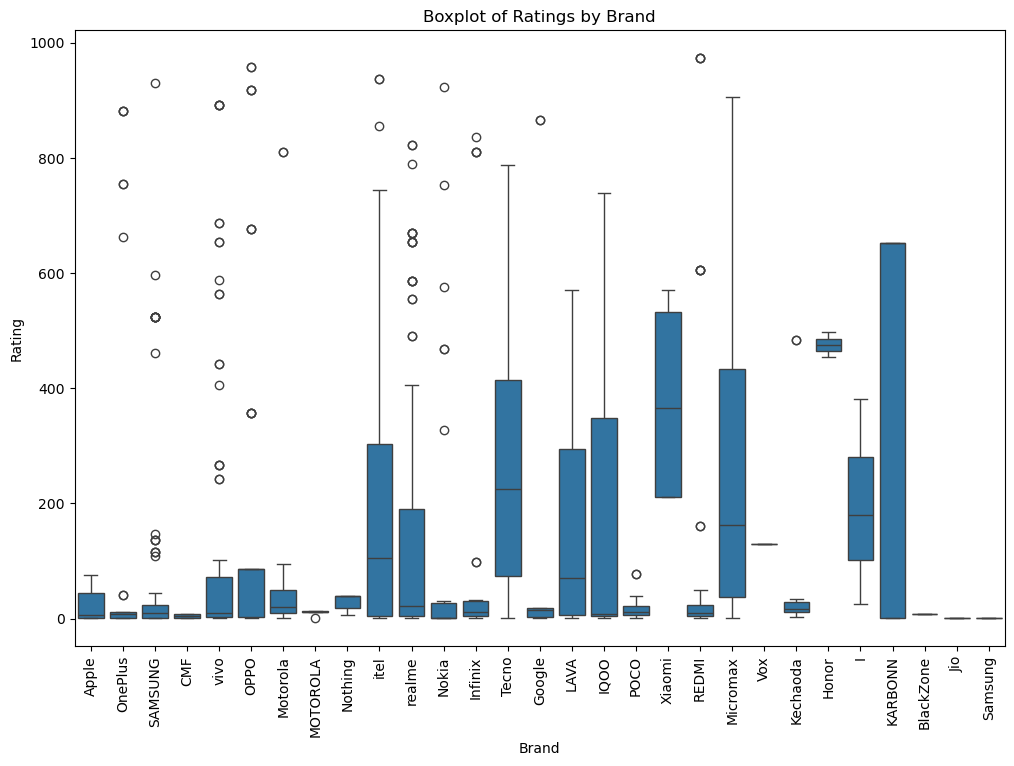

In [115]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Rating', data=df)
plt.title('Boxplot of Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()